In [432]:
#First step is to install the same modules as I used for the Wine Data Projects, because I will use the same techniques.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [433]:
#Then I will import the revised file after my DataWrangling into a dataframe.
df = pd.read_csv('CO2_Prediction_After_Wrangling.csv')

In [434]:
df.head()

,Data Year,Plant state abbreviation,Utility name,Plant name,Plant-level sector,Balancing Authority Name,eGRID subregion name,Plant latitude,Plant longitude,Number of units,...,Plant annual CO2 emissions (tons),Plant annual CH4 emissions (lbs),Plant annual CO2 total output emission rate (lb/MWh),Plant annual CH4 total output emission rate (lb/MWh),Plant unadjusted annual heat input from combustion (MMBtu),Plant nominal heat rate (Btu/kWh),Plant annual total nonrenewables net generation (MWh),Plant annual total renewables net generation (MWh),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix)
0,2018,AK,"Alaska Village Elec Coop, Inc",Alakanuk,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,62.683300,-164.654400,5,...,0.000,0.000,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0.0
1,2018,AK,"Copper Valley Elec Assn, Inc",Allison Creek Hydro,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,61.084444,-146.353333,1,...,0.000,0.000,0.000,0.000,NaN,NaN,0.0,23077.0,0.0,1.0
2,2018,AK,"Alaska Village Elec Coop, Inc",Ambler,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,67.087980,-157.856719,3,...,996.124,80.676,1651.948,0.067,12197.999,10114.427032,1206.0,0.0,1.0,0.0
3,2018,AK,Anchorage Municipal Light and Power,Anchorage 1,Electric Utility,Anchorage Municipal Light & Power,ASCC Alaska Grid,61.222100,-149.866100,8,...,22650.454,859.171,1565.501,0.030,387517.000,13391.747590,28937.0,0.0,1.0,0.0
4,2018,AK,"Inside Passage Elec Coop, Inc",Angoon,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,57.499166,-134.586140,4,...,1432.692,116.034,1733.445,0.070,17544.000,10613.430127,1653.0,0.0,1.0,0.0


In [435]:
df.shape

(9123, 28)

In [436]:
df.dtypes

Data Year                                                                int64
Plant state abbreviation                                                object
Utility name                                                            object
Plant name                                                              object
Plant-level sector                                                      object
Balancing Authority Name                                                object
eGRID subregion name                                                    object
Plant latitude                                                         float64
Plant longitude                                                        float64
Number of units                                                          int64
Number of generators                                                     int64
Plant primary fuel                                                      object
Plant primary coal/oil/gas/ other fossil fuel catego

In [437]:
#Now I'm curious about the composition of the Plant annual CO2 emmissions (tons) column.  This is going to be our independent variable.
df['Plant annual CO2 emissions (tons)'].value_counts()



0.000          6052
0.001            60
0.002            19
0.003             7
4.573             5
               ... 
2814.864          1
247811.700        1
1561998.200       1
860180.300        1
118503.720        1
Name: Plant annual CO2 emissions (tons), Length: 2949, dtype: int64

In [438]:
# Get a basic statistical summary of the variable 
print(df['Plant annual CO2 emissions (tons)'].describe)

print(df['Plant annual CO2 emissions (tons)'].mean())

print(df['Plant annual CO2 emissions (tons)'].std())

print(df['Plant annual CO2 emissions (tons)'].max())



<bound method NDFrame.describe of 0             0.000
1             0.000
2           996.124
3         22650.454
4          1432.692
           ...     
9118       2139.344
9119     830991.800
9120     982289.900
9121    1062853.800
9122    2988233.100
Name: Plant annual CO2 emissions (tons), Length: 9123, dtype: float64>
215894.06090485587
1134127.309376531
20155730.7


In [439]:
#I'm goinng to try to transform this data so that it is easier to map.

df['Ann CO2 Emissions Million Tons'] = round(df['Plant annual CO2 emissions (tons)'] / 1000000, 2)

df.head()

,Data Year,Plant state abbreviation,Utility name,Plant name,Plant-level sector,Balancing Authority Name,eGRID subregion name,Plant latitude,Plant longitude,Number of units,...,Plant annual CH4 emissions (lbs),Plant annual CO2 total output emission rate (lb/MWh),Plant annual CH4 total output emission rate (lb/MWh),Plant unadjusted annual heat input from combustion (MMBtu),Plant nominal heat rate (Btu/kWh),Plant annual total nonrenewables net generation (MWh),Plant annual total renewables net generation (MWh),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Ann CO2 Emissions Million Tons
0,2018,AK,"Alaska Village Elec Coop, Inc",Alakanuk,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,62.683300,-164.654400,5,...,0.000,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0.0,0.00
1,2018,AK,"Copper Valley Elec Assn, Inc",Allison Creek Hydro,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,61.084444,-146.353333,1,...,0.000,0.000,0.000,NaN,NaN,0.0,23077.0,0.0,1.0,0.00
2,2018,AK,"Alaska Village Elec Coop, Inc",Ambler,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,67.087980,-157.856719,3,...,80.676,1651.948,0.067,12197.999,10114.427032,1206.0,0.0,1.0,0.0,0.00
3,2018,AK,Anchorage Municipal Light and Power,Anchorage 1,Electric Utility,Anchorage Municipal Light & Power,ASCC Alaska Grid,61.222100,-149.866100,8,...,859.171,1565.501,0.030,387517.000,13391.747590,28937.0,0.0,1.0,0.0,0.02
4,2018,AK,"Inside Passage Elec Coop, Inc",Angoon,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,57.499166,-134.586140,4,...,116.034,1733.445,0.070,17544.000,10613.430127,1653.0,0.0,1.0,0.0,0.00


(array([8.586e+03, 1.640e+02, 1.160e+02, 5.800e+01, 4.200e+01, 2.200e+01,
        1.700e+01, 1.000e+01, 2.300e+01, 1.400e+01, 6.000e+00, 1.300e+01,
        1.100e+01, 6.000e+00, 1.000e+00, 8.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  0.672,  1.344,  2.016,  2.688,  3.36 ,  4.032,  4.704,
         5.376,  6.048,  6.72 ,  7.392,  8.064,  8.736,  9.408, 10.08 ,
        10.752, 11.424, 12.096, 12.768, 13.44 , 14.112, 14.784, 15.456,
        16.128, 16.8  , 17.472, 18.144, 18.816, 19.488, 20.16 ]),
 <a list of 30 Patch objects>)

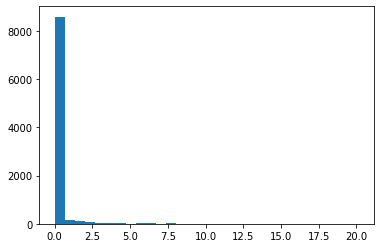

In [440]:
plt.hist(df['Ann CO2 Emissions Million Tons'], bins=30)

In [441]:
#I would like to get a better idea of the plants with significant CO2 pollution.   How about the ones that are above 5 million tons a year

Dfmorethanton = df[df['Ann CO2 Emissions Million Tons'] >= 5]

Dflessthanton = df[df['Ann CO2 Emissions Million Tons'] <= 5]


(array([13., 18., 14.,  3.,  4., 13.,  7.,  6.,  4.,  1.,  4.,  6.,  1.,
         4.,  1.,  2.,  4.,  1.,  1.,  1.,  1.,  2.,  2.,  0.,  0.,  2.,
         1.,  0.,  0.,  1.]),
 array([ 5.01 ,  5.515,  6.02 ,  6.525,  7.03 ,  7.535,  8.04 ,  8.545,
         9.05 ,  9.555, 10.06 , 10.565, 11.07 , 11.575, 12.08 , 12.585,
        13.09 , 13.595, 14.1  , 14.605, 15.11 , 15.615, 16.12 , 16.625,
        17.13 , 17.635, 18.14 , 18.645, 19.15 , 19.655, 20.16 ]),
 <a list of 30 Patch objects>)

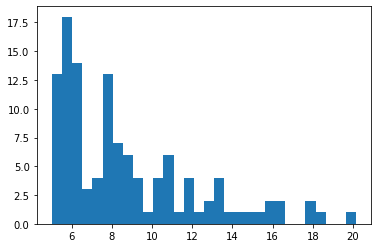

In [442]:
plt.hist(Dfmorethanton['Ann CO2 Emissions Million Tons'], bins = 30)

(array([8.515e+03, 1.630e+02, 9.300e+01, 9.300e+01, 4.200e+01, 4.000e+01,
        2.300e+01, 1.400e+01, 1.500e+01, 8.000e+00]),
 array([0.   , 0.496, 0.992, 1.488, 1.984, 2.48 , 2.976, 3.472, 3.968,
        4.464, 4.96 ]),
 <a list of 10 Patch objects>)

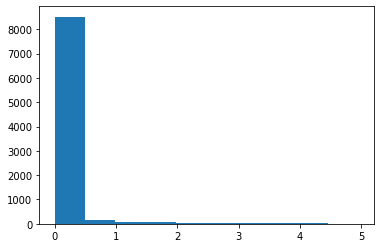

In [443]:
plt.hist(Dflessthanton['Ann CO2 Emissions Million Tons'])

In [444]:
#Looks like there are mostly plants that don't emit alot.  There are only a few that have really large emissions.
#How many plants are there in each state?

df['Plant state abbreviation'].value_counts()

CA    1390
NC     677
NY     476
TX     459
MN     451
MA     402
NJ     281
IA     249
MI     232
PA     223
IL     202
WI     191
OR     190
CO     190
FL     175
OH     173
GA     158
IN     156
VA     153
AK     143
KS     141
ID     138
WA     137
SC     134
AZ     128
MO     125
CT     114
MD     114
OK     110
NE     108
NM     107
UT     103
ME      99
VT      94
NV      83
LA      78
AL      77
TN      72
WY      63
MT      60
NH      59
HI      58
AR      58
ND      55
KY      51
MS      43
RI      43
SD      36
WV      34
DE      28
DC       2
Name: Plant state abbreviation, dtype: int64

In [445]:
#Which states are the worst emitors?

statetotals = df.groupby('Plant state abbreviation')['Ann CO2 Emissions Million Tons'].sum()

print(statetotals)

Plant state abbreviation
AK      2.73
AL     61.88
AR     41.18
AZ     53.98
CA     40.96
CO     37.71
CT      9.98
DC      0.02
DE      2.80
FL    114.81
GA     59.40
HI      7.41
IA     33.78
ID      1.46
IL     76.43
IN     98.52
KS     25.54
KY     71.82
LA     40.45
MA      9.81
MD     18.28
ME      1.46
MI     64.12
MN     30.53
MO     69.09
MS     29.08
MT     16.30
NC     53.61
ND     32.08
NE     25.99
NH      2.55
NJ     18.72
NM     21.66
NV     14.76
NY     27.59
OH     83.37
OK     38.38
OR     10.00
PA     84.40
RI      3.63
SC     31.30
SD      3.27
TN     30.31
TX    231.59
UT     31.46
VA     34.95
VT      0.04
WA     11.61
WI     45.62
WV     65.42
WY     47.23
Name: Ann CO2 Emissions Million Tons, dtype: float64


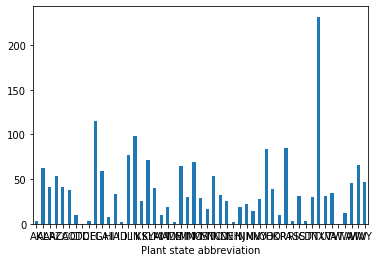

In [446]:
#That's interesting.  I want to see a bar chart of these totals.

statetotals.plot.bar(x='Plant state abbreviation', y='Ann CO2 Emissions Million Tons', rot=0)

(array([0.000e+00, 4.799e+03, 0.000e+00, 1.538e+03, 9.020e+02, 0.000e+00,
        6.530e+02, 3.480e+02, 0.000e+00, 2.630e+02, 1.480e+02, 0.000e+00,
        1.520e+02, 6.600e+01, 0.000e+00, 5.700e+01, 3.500e+01, 0.000e+00,
        5.800e+01, 1.600e+01, 0.000e+00, 1.200e+01, 1.000e+01, 0.000e+00,
        1.200e+01, 4.000e+00, 0.000e+00, 1.000e+01, 3.000e+00, 5.000e+00]),
 array([ 0.        ,  0.66666667,  1.33333333,  2.        ,  2.66666667,
         3.33333333,  4.        ,  4.66666667,  5.33333333,  6.        ,
         6.66666667,  7.33333333,  8.        ,  8.66666667,  9.33333333,
        10.        , 10.66666667, 11.33333333, 12.        , 12.66666667,
        13.33333333, 14.        , 14.66666667, 15.33333333, 16.        ,
        16.66666667, 17.33333333, 18.        , 18.66666667, 19.33333333,
        20.        ]),
 <a list of 30 Patch objects>)

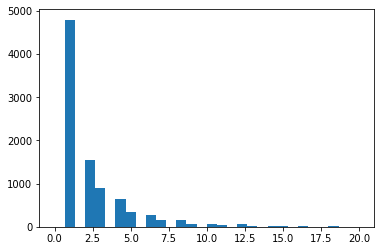

In [447]:
#Now I will explore number of units
plt.hist(df['Number of units'], bins = 30, range=[0,20])

In [448]:
#Let's do a value_counts() on units

df['Number of units'].value_counts()

1     4799
2     1538
3      902
4      653
5      348
6      263
8      152
7      148
9       66
12      58
10      57
11      35
13      16
14      12
16      12
18      10
15      10
20       5
48       4
17       4
21       4
22       4
24       3
19       3
36       3
27       2
32       2
31       2
34       1
73       1
41       1
33       1
23       1
35       1
28       1
29       1
Name: Number of units, dtype: int64

In [449]:
#Now I want to see by category how these values shake out.
df.groupby('Plant primary coal/oil/gas/ other fossil fuel category')['Ann CO2 Emissions Million Tons'].count()

Plant primary coal/oil/gas/ other fossil fuel category
BIOMASS        710
COAL           345
GAS           1708
GEOTHERMAL      64
HYDRO         1448
NUCLEAR         61
OFSL            19
OIL            819
OTHF           127
SOLAR         2719
WIND          1103
Name: Ann CO2 Emissions Million Tons, dtype: int64

In [450]:
df.groupby('Plant primary coal/oil/gas/ other fossil fuel category')['Ann CO2 Emissions Million Tons'].sum()

Plant primary coal/oil/gas/ other fossil fuel category
BIOMASS         17.38
COAL          1301.56
GAS            623.22
GEOTHERMAL       1.20
HYDRO            0.00
NUCLEAR          2.50
OFSL             4.18
OIL             15.70
OTHF             3.25
SOLAR            0.08
WIND             0.00
Name: Ann CO2 Emissions Million Tons, dtype: float64

In [451]:
#It's clear from these numbers that I should really only be looking at coal and gas emissions.   I'm going to make a new dataframe that is just Coal and Gas.  Also only the plants that have energy production (MWh) greater than 0.

dfCOAL = df[df['Plant primary coal/oil/gas/ other fossil fuel category']=='COAL']
dfGAS = df[df['Plant primary coal/oil/gas/ other fossil fuel category']=='GAS']

df = dfCOAL.append(dfGAS)

df = df[df['Plant annual net generation (MWh)']>0]


In [452]:
#I'm just going to get rid of anything where the plant had any renewable generation at all.

df = df[df['Plant total renewables generation percent (resource mix)']==0]

In [453]:
#I should have done this from the beginning.  Now I will restart exploratory analysis

df.shape

(1860, 29)

In [454]:
df.dtypes

Data Year                                                                int64
Plant state abbreviation                                                object
Utility name                                                            object
Plant name                                                              object
Plant-level sector                                                      object
Balancing Authority Name                                                object
eGRID subregion name                                                    object
Plant latitude                                                         float64
Plant longitude                                                        float64
Number of units                                                          int64
Number of generators                                                     int64
Plant primary fuel                                                      object
Plant primary coal/oil/gas/ other fossil fuel catego

In [455]:
df['Plant state abbreviation'].value_counts()

CA    257
TX    175
NY     88
IL     81
PA     76
MI     66
FL     65
OH     54
KS     52
LA     48
IN     45
NJ     43
WI     40
MO     40
CT     40
IA     39
CO     34
NE     34
MN     34
VA     34
MA     33
OK     31
GA     31
AZ     31
MS     27
AL     27
UT     26
NC     26
MD     23
SC     22
AR     22
KY     21
NM     20
WY     19
NV     17
WA     17
AK     16
TN     15
WV     14
OR     13
MT     11
ND      9
RI      9
SD      8
ID      8
DE      7
ME      6
NH      4
HI      1
DC      1
Name: Plant state abbreviation, dtype: int64

In [456]:
bystate = df.groupby('Plant state abbreviation')['Ann CO2 Emissions Million Tons'].sum()
print(bystate)


Plant state abbreviation
AK      2.17
AL     61.27
AR     41.05
AZ     43.11
CA     36.94
CO     37.71
CT      8.88
DC      0.02
DE      0.95
FL     92.28
GA     58.89
HI      1.55
IA     33.08
ID      1.45
IL     76.42
IN     97.53
KS     25.54
KY     69.00
LA     38.46
MA      8.06
MD     17.76
ME      0.89
MI     63.10
MN     28.98
MO     67.43
MS     28.71
MT     15.91
NC     53.05
ND     32.06
NE     25.88
NH      2.03
NJ     17.41
NM     21.63
NV     14.51
NY     23.57
OH     81.47
OK     35.30
OR      9.89
PA     81.70
RI      3.63
SC     30.95
SD      3.27
TN     29.51
TX    229.28
UT     31.42
VA     29.31
WA     11.36
WI     45.21
WV     65.42
WY     46.93
Name: Ann CO2 Emissions Million Tons, dtype: float64


In [457]:
df.head()


,Data Year,Plant state abbreviation,Utility name,Plant name,Plant-level sector,Balancing Authority Name,eGRID subregion name,Plant latitude,Plant longitude,Number of units,...,Plant annual CH4 emissions (lbs),Plant annual CO2 total output emission rate (lb/MWh),Plant annual CH4 total output emission rate (lb/MWh),Plant unadjusted annual heat input from combustion (MMBtu),Plant nominal heat rate (Btu/kWh),Plant annual total nonrenewables net generation (MWh),Plant annual total renewables net generation (MWh),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Ann CO2 Emissions Million Tons
8,2018,AK,Aurora Energy LLC,Aurora Energy LLC Chena,IPP CHP,Alaska Miscellaneous,ASCC Alaska Grid,64.847743,-147.735063,4,...,39367.557,1952.669,0.221,3270570.300,9129.209435,177819.000,0.0,1.0,0.0,0.17
28,2018,AK,U S Air Force-Eielson AFB,Eielson AFB Central Heat & Power Plant,Commercial CHP,Alaska Miscellaneous,ASCC Alaska Grid,64.671410,-147.075988,12,...,9125.616,1188.374,0.135,2531566.983,5556.757950,67750.000,0.0,1.0,0.0,0.04
49,2018,AK,Golden Valley Elec Assn Inc,Healy,Electric Utility,Alaska Miscellaneous,ASCC Alaska Grid,63.854200,-148.950000,3,...,90442.723,3041.630,0.345,3787280.400,14429.658867,262464.999,0.0,1.0,0.0,0.40
133,2018,AK,University of Alaska,University of Alaska Fairbanks,Commercial CHP,Alaska Miscellaneous,ASCC Alaska Grid,64.854171,-147.822075,6,...,5199.367,1188.837,0.125,1192968.300,5755.087741,41638.000,0.0,1.0,0.0,0.02
135,2018,AK,Doyon Utilities - Ft. Wainwright,Utility Plants Section,Electric Utility,Alaska Miscellaneous,ASCC Alaska Grid,64.825601,-147.648627,6,...,13526.302,1322.975,0.150,3398927.058,6185.233963,90177.000,0.0,1.0,0.0,0.06


In [458]:
#What is the distribution of generation amongst all these plants?

df['Plant annual net generation (MWh)'].value_counts()

30.0        3
62.0        3
13.0        3
720.0       2
8434.0      2
           ..
22110.0     1
44177.0     1
425306.0    1
547512.0    1
144.0       1
Name: Plant annual net generation (MWh), Length: 1840, dtype: int64

(array([1.236e+03, 1.320e+02, 8.100e+01, 7.000e+01, 6.500e+01, 4.900e+01,
        4.400e+01, 4.300e+01, 3.200e+01, 1.100e+01, 1.700e+01, 1.600e+01,
        9.000e+00, 1.000e+01, 9.000e+00, 8.000e+00, 3.000e+00, 5.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 6.61364767e+05, 1.32272853e+06, 1.98409230e+06,
        2.64545607e+06, 3.30681983e+06, 3.96818360e+06, 4.62954737e+06,
        5.29091113e+06, 5.95227490e+06, 6.61363867e+06, 7.27500243e+06,
        7.93636620e+06, 8.59772997e+06, 9.25909373e+06, 9.92045750e+06,
        1.05818213e+07, 1.12431850e+07, 1.19045488e+07, 1.25659126e+07,
        1.32272763e+07, 1.38886401e+07, 1.45500039e+07, 1.52113676e+07,
        1.58727314e+07, 1.65340952e+07, 1.71954589e+07, 1.78568227e+07,
        1.85181865e+07, 1.91795502e+07, 1.98409140e+07]),
 <a list of 30 Patch objects>)

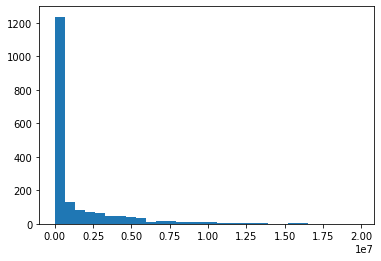

In [459]:
plt.hist(df['Plant annual net generation (MWh)'],bins=30)

In [460]:
Dflarge = df[df['Plant annual net generation (MWh)'] >= 1000000]

(array([91., 73., 55., 50., 55., 43., 39., 26., 13., 15., 14., 10.,  9.,
         9.,  7.,  5.,  3.,  4.,  3.,  4.,  2.,  0.,  1.,  3.,  1.,  1.,
         1.,  1.,  0.,  1.]),
 array([ 1003780.        ,  1631684.46666667,  2259588.93333333,
         2887493.4       ,  3515397.86666667,  4143302.33333333,
         4771206.8       ,  5399111.26666667,  6027015.73333333,
         6654920.2       ,  7282824.66666667,  7910729.13333333,
         8538633.6       ,  9166538.06666667,  9794442.53333333,
        10422347.        , 11050251.46666667, 11678155.93333333,
        12306060.4       , 12933964.86666667, 13561869.33333333,
        14189773.8       , 14817678.26666667, 15445582.73333333,
        16073487.2       , 16701391.66666667, 17329296.13333333,
        17957200.6       , 18585105.06666667, 19213009.53333334,
        19840914.        ]),
 <a list of 30 Patch objects>)

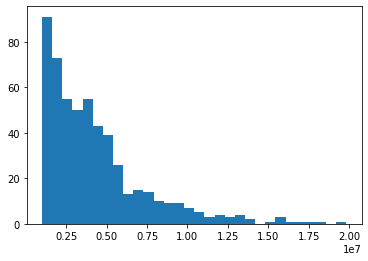

In [461]:
plt.hist(Dflarge['Plant annual net generation (MWh)'],bins=30)

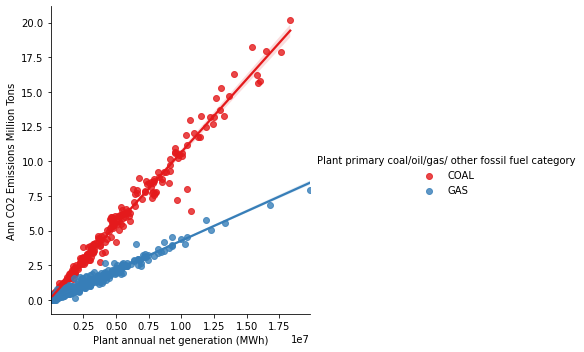

In [462]:
#plt.scatter(df['Plant annual net generation (MWh)'], df['Ann CO2 Emissions Million Tons'])


sns.lmplot(x='Plant annual net generation (MWh)', y='Ann CO2 Emissions Million Tons', data=df, hue='Plant primary coal/oil/gas/ other fossil fuel category',palette='Set1')

In [463]:
#This must be the effect of gas vs natural gas.  Let's plot those seperately
dfCOAL = df[df['Plant primary coal/oil/gas/ other fossil fuel category']=='COAL']
dfGAS = df[df['Plant primary coal/oil/gas/ other fossil fuel category']=='GAS']

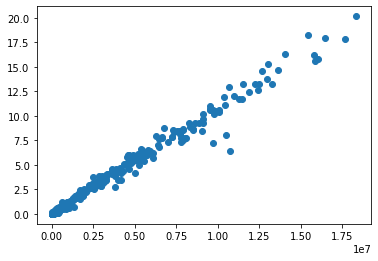

In [464]:
plt.scatter(dfCOAL['Plant annual net generation (MWh)'], dfCOAL['Ann CO2 Emissions Million Tons'])

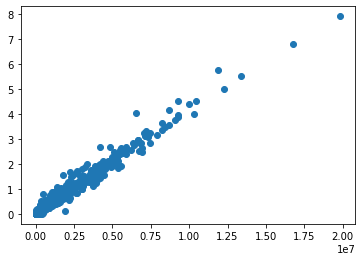

In [465]:
plt.scatter(dfGAS['Plant annual net generation (MWh)'], dfGAS['Ann CO2 Emissions Million Tons'])

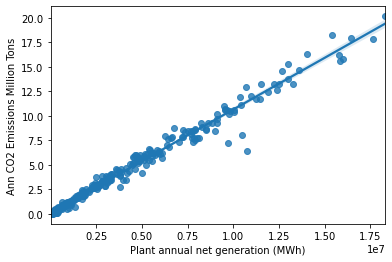

In [466]:
#As expected this is a very direct relationship in both cases.  This seems to be a direct linear relationship.

sns.regplot('Plant annual net generation (MWh)', 'Ann CO2 Emissions Million Tons', data=dfCOAL)

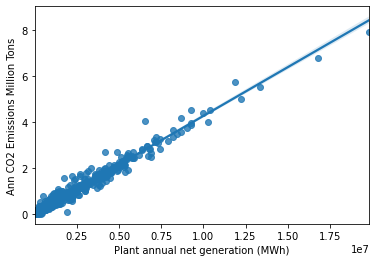

In [467]:
sns.regplot('Plant annual net generation (MWh)', 'Ann CO2 Emissions Million Tons', data=dfGAS)

In [468]:
#This is something maybe I can come back to as something to test to see if there is a significant difference between the COAL and GAS emissions.
#First, I'm going to build a linear model between Annual Emissions and Power Generation for Coal and Gas

y = dfCOAL[['Ann CO2 Emissions Million Tons']]
X = dfCOAL[['Plant annual net generation (MWh)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [469]:
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(237, 1)
(79, 1)
(237, 1)
(79, 1)


In [470]:
rModel = linear_model.LinearRegression(normalize=True)

In [471]:
# We now want to train the model on our test data.
rModel.fit(X_train,y_train)

LinearRegression(normalize=True)

In [472]:
# Evaluate the model  
print(rModel.score(X_train,y_train))

0.9819393289548926


In [473]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

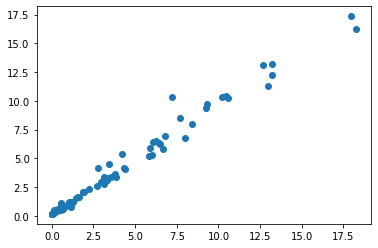

In [474]:

# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test,y_pred)

In [475]:
#Now I"m goinig to make a GAS Model using the OLS Method.

X = dfGAS[['Plant annual net generation (MWh)']]

In [476]:
X = sm.add_constant(X)

In [477]:
y = dfGAS[['Ann CO2 Emissions Million Tons']]
X = dfGAS[['Plant annual net generation (MWh)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [478]:
# Create the model
rModel2 = sm.OLS(y_train,X_train)

# Fit the model with fit() 
rModel2_results = rModel2.fit()

In [479]:
# Evaluate the model with .summary()
print(rModel2_results.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Ann CO2 Emissions Million Tons   R-squared (uncentered):                   0.984
Model:                                        OLS   Adj. R-squared (uncentered):              0.984
Method:                             Least Squares   F-statistic:                          7.294e+04
Date:                            Mon, 06 Jul 2020   Prob (F-statistic):                        0.00
Time:                                    14:27:10   Log-Likelihood:                          863.52
No. Observations:                            1158   AIC:                                     -1725.
Df Residuals:                                1157   BIC:                                     -1720.
Df Model:                                       1                                                  
Covariance Type:                        nonrobust                                                  


In [480]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel2_results.predict(X_test)


Text(0, 0.5, 'CO2 Generated - Natural Gas')

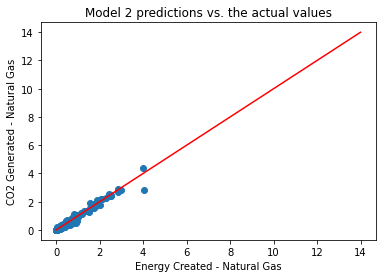

In [481]:

# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel("Energy Created - Natural Gas")
plt.ylabel("CO2 Generated - Natural Gas")

In [482]:
#These are very accurate models, but they are no surprise.  Let's investigate some factors that aren't as obvious. 
dfGAS.corr()

,Data Year,Plant latitude,Plant longitude,Number of units,Number of generators,Flag indicating if the plant burned or generated any amount of coal,Plant capacity factor,Plant nameplate capacity (MW),Nonbaseload Factor,Plant annual net generation (MWh),...,Plant annual CH4 emissions (lbs),Plant annual CO2 total output emission rate (lb/MWh),Plant annual CH4 total output emission rate (lb/MWh),Plant unadjusted annual heat input from combustion (MMBtu),Plant nominal heat rate (Btu/kWh),Plant annual total nonrenewables net generation (MWh),Plant annual total renewables net generation (MWh),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Ann CO2 Emissions Million Tons
Data Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plant latitude,NaN,1.000000,0.065375,-0.006455,-0.083862,-0.015647,-0.135340,-0.229976,0.120035,-0.202163,...,-0.204923,0.022984,0.032479,-0.228417,0.021707,-0.202163,NaN,NaN,NaN,-0.204540
Plant longitude,NaN,0.065375,1.000000,0.055648,0.099375,-0.028960,-0.044196,0.131185,0.051187,0.121955,...,0.124381,-0.023235,-0.018180,0.117574,-0.033334,0.121955,NaN,NaN,NaN,0.122080
Number of units,NaN,-0.006455,0.055648,1.000000,0.790261,-0.063320,-0.178015,0.253035,0.188074,0.111673,...,0.125413,0.020447,0.015867,0.143994,0.012323,0.111673,NaN,NaN,NaN,0.125649
Number of generators,NaN,-0.083862,0.099375,0.790261,1.000000,-0.104628,-0.174554,0.520121,0.200867,0.291088,...,0.317192,0.011302,0.014221,0.306366,0.001422,0.291088,NaN,NaN,NaN,0.308584
Flag indicating if the plant burned or generated any amount of coal,NaN,-0.015647,-0.028960,-0.063320,-0.104628,1.000000,0.007985,-0.052317,-0.029044,-0.016533,...,-0.118053,0.009639,-0.030497,-0.025340,0.014806,-0.016533,NaN,NaN,NaN,-0.030738
Plant capacity factor,NaN,-0.135340,-0.044196,-0.178015,-0.174554,0.007985,1.000000,0.026560,-0.973346,0.355616,...,0.317039,-0.158044,-0.138050,0.367304,-0.142250,0.355616,NaN,NaN,NaN,0.329751
Plant nameplate capacity (MW),NaN,-0.229976,0.131185,0.253035,0.520121,-0.052317,0.026560,1.000000,0.022615,0.759671,...,0.783897,-0.038126,-0.041832,0.758117,-0.044708,0.759671,NaN,NaN,NaN,0.785426
Nonbaseload Factor,NaN,0.120035,0.051187,0.188074,0.200867,-0.029044,-0.973346,0.022615,1.000000,-0.313770,...,-0.268019,0.130167,0.108917,-0.321257,0.113756,-0.313770,NaN,NaN,NaN,-0.282161
Plant annual net generation (MWh),NaN,-0.202163,0.121955,0.111673,0.291088,-0.016533,0.355616,0.759671,-0.313770,1.000000,...,0.967043,-0.065455,-0.067893,0.981271,-0.068990,1.000000,NaN,NaN,NaN,0.989928


In [483]:
dfCOAL.corr()

,Data Year,Plant latitude,Plant longitude,Number of units,Number of generators,Flag indicating if the plant burned or generated any amount of coal,Plant capacity factor,Plant nameplate capacity (MW),Nonbaseload Factor,Plant annual net generation (MWh),...,Plant annual CH4 emissions (lbs),Plant annual CO2 total output emission rate (lb/MWh),Plant annual CH4 total output emission rate (lb/MWh),Plant unadjusted annual heat input from combustion (MMBtu),Plant nominal heat rate (Btu/kWh),Plant annual total nonrenewables net generation (MWh),Plant annual total renewables net generation (MWh),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Ann CO2 Emissions Million Tons
Data Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plant latitude,NaN,1.000000,-0.363627,0.033542,-0.005976,-0.000409,0.055835,-0.334555,-0.042785,-0.228748,...,-0.194545,0.003083,0.023231,-0.225848,-0.017756,-0.228748,NaN,NaN,NaN,-0.218694
Plant longitude,NaN,-0.363627,1.000000,0.029315,0.079566,0.106593,-0.241275,0.155471,0.216901,0.028706,...,0.009929,-0.023860,-0.045092,0.014818,-0.001719,0.028706,NaN,NaN,NaN,0.010408
Number of units,NaN,0.033542,0.029315,1.000000,0.735232,0.001664,-0.173435,0.366251,0.187726,0.217878,...,0.176357,-0.155177,-0.165635,0.232765,-0.121742,0.217878,NaN,NaN,NaN,0.193534
Number of generators,NaN,-0.005976,0.079566,0.735232,1.000000,-0.095136,-0.291241,0.464609,0.313120,0.220417,...,0.163547,-0.088136,-0.105480,0.221557,-0.050828,0.220417,NaN,NaN,NaN,0.193799
Flag indicating if the plant burned or generated any amount of coal,NaN,-0.000409,0.106593,0.001664,-0.095136,1.000000,-0.039095,-0.159341,0.044746,-0.133426,...,-0.139260,-0.214088,-0.262409,-0.130177,-0.152405,-0.133426,NaN,NaN,NaN,-0.141126
Plant capacity factor,NaN,0.055835,-0.241275,-0.173435,-0.291241,-0.039095,1.000000,0.041859,-0.981491,0.435021,...,0.443397,0.036927,0.056953,0.442476,-0.008644,0.435021,NaN,NaN,NaN,0.442523
Plant nameplate capacity (MW),NaN,-0.334555,0.155471,0.366251,0.464609,-0.159341,0.041859,1.000000,-0.015250,0.830618,...,0.796756,-0.041386,-0.020008,0.825933,-0.034482,0.830618,NaN,NaN,NaN,0.818817
Nonbaseload Factor,NaN,-0.042785,0.216901,0.187726,0.313120,0.044746,-0.981491,-0.015250,1.000000,-0.419587,...,-0.430311,-0.047345,-0.063450,-0.425276,-0.005793,-0.419587,NaN,NaN,NaN,-0.427386
Plant annual net generation (MWh),NaN,-0.228748,0.028706,0.217878,0.220417,-0.133426,0.435021,0.830618,-0.419587,1.000000,...,0.979482,-0.050553,-0.017316,0.994562,-0.060704,1.000000,NaN,NaN,NaN,0.990719


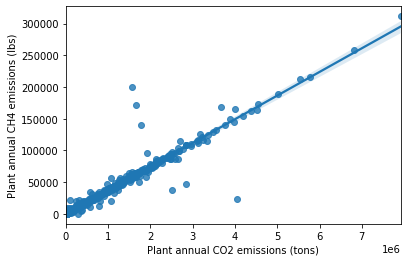

In [484]:
#How much does Methane emission rise with CO2 Emission for Coal and Natural Gas.  Are the ratios different?

sns.regplot('Plant annual CO2 emissions (tons)', 'Plant annual CH4 emissions (lbs)', data=dfGAS)

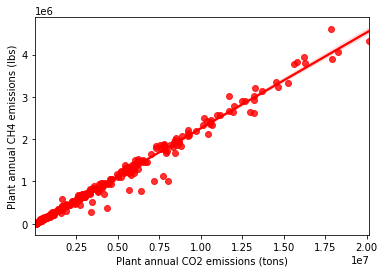

In [485]:
sns.regplot('Plant annual CO2 emissions (tons)', 'Plant annual CH4 emissions (lbs)', data=dfCOAL, color='red', marker = 'o')

In [486]:
#Now I'm going to make a multiple regression including 'Plant unadjusted annual heat input from combustion (MMBtu)' to see if I can make the model more accurate.

X = dfCOAL[['Plant annual net generation (MWh)','Plant unadjusted annual heat input from combustion (MMBtu)']]



In [487]:
X = sm.add_constant(X)

In [488]:
y = dfCOAL[['Ann CO2 Emissions Million Tons']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [489]:
# Create the model
rModel3 = sm.OLS(y_train,X_train)

# Fit the model with fit() 
rModel3_results = rModel3.fit()

In [490]:
print(rModel3_results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Ann CO2 Emissions Million Tons   R-squared:                       0.991
Model:                                        OLS   Adj. R-squared:                  0.991
Method:                             Least Squares   F-statistic:                 1.240e+04
Date:                            Mon, 06 Jul 2020   Prob (F-statistic):          3.67e-238
Time:                                    14:27:11   Log-Likelihood:                -122.02
No. Observations:                             237   AIC:                             250.0
Df Residuals:                                 234   BIC:                             260.4
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                                                                 coef    std err          

In [491]:
#This produces an even higher R-squared.  Wow!

In [492]:
#This command turns a dataframe into a numpy 1D array:

coaltest = dfCOAL['Plant annual CO2 total output emission rate (lb/MWh)'].values.ravel()
gastest = dfGAS['Plant annual CO2 total output emission rate (lb/MWh)'].values.ravel()

In [493]:
coalnew = np.random.choice(coaltest,100, replace = False)
gasnew = np.random.choice(gastest,100, replace = False)

In [494]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [495]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [496]:
# I want to test the null hypothesis the CO2 Emissions for Natural Gas are the same as for Coal.  I already know the answer, but I will do this to test my null hypothesis testing.  I'll use the 'Plant annual CO2 total output emission rate (lb/MWh)' metric to test this.
#Plant annual CO2 total output emission rate (lb/MWh)

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


In [497]:
coalvgas = diff_of_means(coalnew, gasnew)

In [498]:
perm_replicates = draw_perm_reps(coalnew, gasnew,diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= coalvgas) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0


In [499]:
#We can clearly reject the null hypotheses that the mean Coal CO2 emission rate is the same as the mean Gas CO2 emission rate.

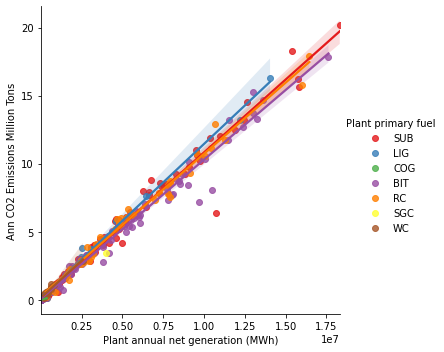

In [500]:
#Within coal there seems to be a difference between the emissions depending on the type of fuel also. 
sns.lmplot(x='Plant annual net generation (MWh)', y='Ann CO2 Emissions Million Tons', data=dfCOAL, hue='Plant primary fuel',palette='Set1')

In [501]:
dfCOAL['Plant primary fuel'].value_counts()

SUB    124
BIT    111
RC      42
WC      17
LIG     15
COG      6
SGC      1
Name: Plant primary fuel, dtype: int64

In [502]:
#I will make the null hypothesis that SUB and BIT Fuel types produce the same emissions

In [503]:
SUB = dfCOAL[dfCOAL['Plant primary fuel']=='SUB']

In [504]:
SUB = SUB['Plant annual CO2 total output emission rate (lb/MWh)'].values.ravel()

In [505]:
BIT = dfCOAL[dfCOAL['Plant primary fuel']=='BIT']

In [506]:
BIT = BIT['Plant annual CO2 total output emission rate (lb/MWh)'].values.ravel()

In [507]:
SUBvsBIT = diff_of_means(SUB, BIT)

print(SUBvsBIT)

256.5660242662025


In [508]:
perm_replicates2 = draw_perm_reps(SUB, BIT, diff_of_means, size=10000)


In [509]:
# Compute p-value: p
p = np.sum(perm_replicates2 >= SUBvsBIT) / len(perm_replicates2)

# Print the result
print('p-value =', p)

p-value = 0.0173


In [510]:
#This also shows that using the SUB vs the BIT fuel source leads to significantly different results in CO2 emissions.

In [511]:
#The last step to do is to use categorical variables (e.g. Plant Primary Fuel) also as part of the Regression to see if I can further improve it.

In [512]:
dfCOAL = pd.concat([dfCOAL, pd.get_dummies(df['Plant primary fuel'])], axis=1).drop(['Plant primary fuel'], axis =1)

In [513]:
dfCOAL.fillna(0, inplace=True)

In [514]:
dfCOAL.corr()

,Data Year,Plant latitude,Plant longitude,Number of units,Number of generators,Flag indicating if the plant burned or generated any amount of coal,Plant capacity factor,Plant nameplate capacity (MW),Nonbaseload Factor,Plant annual net generation (MWh),...,Plant total renewables generation percent (resource mix),Ann CO2 Emissions Million Tons,BIT,COG,LIG,NG,RC,SGC,SUB,WC
Data Year,1.000000,0.988843,-0.988273,0.796243,0.786950,0.987741,0.858396,0.710681,0.864318,0.646580,...,NaN,0.654377,0.556861,0.125748,0.199309,-1.000000,0.335976,0.051267,0.590767,0.212296
Plant latitude,0.988843,1.000000,-0.985518,0.790382,0.777621,0.976712,0.853085,0.667692,0.851470,0.613372,...,NaN,0.622442,0.529052,0.124002,0.199845,-0.988843,0.337134,0.049914,0.597313,0.219393
Plant longitude,-0.988273,-0.985518,1.000000,-0.784198,-0.770226,-0.973618,-0.867229,-0.685646,-0.837525,-0.635654,...,NaN,-0.645501,-0.504605,-0.109725,-0.224439,0.988273,-0.330029,-0.047932,-0.632841,-0.181839
Number of units,0.796243,0.790382,-0.784198,1.000000,0.901052,0.786640,0.629667,0.721755,0.745327,0.615387,...,NaN,0.609578,0.513430,0.100036,0.088884,-0.796243,0.242923,0.026332,0.482329,0.071018
Number of generators,0.786950,0.777621,-0.770226,0.901052,1.000000,0.768140,0.583330,0.760948,0.777345,0.612574,...,NaN,0.605383,0.517082,0.032556,0.098102,-0.786950,0.270633,0.077864,0.469075,0.035734
Flag indicating if the plant burned or generated any amount of coal,0.987741,0.976712,-0.973618,0.786640,0.768140,1.000000,0.844742,0.684471,0.857236,0.622765,...,NaN,0.629697,0.541515,0.267348,0.191726,-0.987741,0.323193,0.049317,0.568291,0.204219
Plant capacity factor,0.858396,0.853085,-0.867229,0.629667,0.583330,0.844742,1.000000,0.625152,0.488697,0.725259,...,NaN,0.733371,0.369268,0.089879,0.158889,-0.858396,0.354059,0.051879,0.540089,0.284281
Plant nameplate capacity (MW),0.710681,0.667692,-0.685646,0.721755,0.760948,0.684471,0.625152,1.000000,0.608859,0.905283,...,NaN,0.900644,0.460895,-0.014833,0.119094,-0.710681,0.332674,0.034371,0.395180,-0.009437
Nonbaseload Factor,0.864318,0.851470,-0.837525,0.745327,0.777345,0.857236,0.488697,0.608859,1.000000,0.397868,...,NaN,0.403050,0.578723,0.127658,0.183960,-0.864318,0.228025,0.038257,0.487137,0.079057
Plant annual net generation (MWh),0.646580,0.613372,-0.635654,0.615387,0.612574,0.622765,0.725259,0.905283,0.397868,1.000000,...,NaN,0.994594,0.367421,-0.012927,0.108908,-0.646580,0.347523,0.036041,0.379688,-0.004255


In [515]:
#Now I'm going to make a multiple regression including 'Plant unadjusted annual heat input from combustion (MMBtu)' to see if I can make the model more accurate.

X = dfCOAL[['Plant annual net generation (MWh)','Plant unadjusted annual heat input from combustion (MMBtu)', 'BIT','COG','LIG','NG','RC','SGC','SUB','WC']]


In [516]:
X = sm.add_constant(X)

In [517]:
y = dfCOAL[['Ann CO2 Emissions Million Tons']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [518]:
# Create the model
rModel4 = sm.OLS(y_train,X_train)

# Fit the model with fit() 
rModel4_results = rModel4.fit()

In [519]:
#This is my most accurate model for predicting CO2 Emissions from COAL with an R2 of .997.

print(rModel4_results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Ann CO2 Emissions Million Tons   R-squared:                       0.997
Model:                                        OLS   Adj. R-squared:                  0.997
Method:                             Least Squares   F-statistic:                 5.065e+04
Date:                            Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                                    14:27:15   Log-Likelihood:                 928.35
No. Observations:                            1395   AIC:                            -1837.
Df Residuals:                                1385   BIC:                            -1784.
Df Model:                                       9                                         
Covariance Type:                        nonrobust                                         
                                                                 coef    std err          

In [520]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel4_results.predict(X_test)

Text(0, 0.5, 'CO2 Generated - COAL')

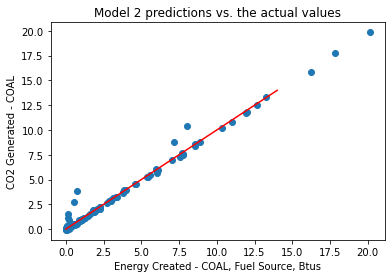

In [521]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel("Energy Created - COAL, Fuel Source, Btus")
plt.ylabel("CO2 Generated - COAL")